In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('Asthma2018.csv', thousands=',') # 'thousands' creates numeric 'incidence' at read-in
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
state             53 non-null object
incidence         53 non-null int64
percentage_sem    53 non-null object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


In [2]:
# Separate percentage and sem, convert to floats, store to df
tmp = df['percentage_sem'].str.split().to_list()
percentage = []
sem = []
for ii in tmp:
    percentage.append(float(ii[0]))
    sem.append(float(ii[1].replace('(','').replace(')','')))
df['percentage'] = percentage
df['sem'] = sem
df.drop(columns = ['percentage_sem'], inplace = True)

In [3]:
df = df.iloc[:-2, :] # drop Guam and Puerto Rico
states_code = ['AL',
               'AK',
               'AZ',
               'AR',
               'CA',
               'CO',
               'CT',
               'DE',
               'DC',
               'FL',
               'GA',
               'HI',
               'ID',
               'IL',
               'IN',
               'IA',
               'KS',
               'KY',
               'LA',
               'ME',
               'MD',
               'MA',
               'MI',
               'MN',
               'MS',
               'MO',
               'MT',
               'NE',
               'NV',
               'NH',
               'NJ',
               'NM',
               'NY',
               'NC',
               'ND',
               'OH',
               'OK',
               'OR',
               'PA',
               'RI',
               'SC',
               'SD',
               'TN',
               'TX',
               'UT',
               'VT',
               'VA',
               'WA',
               'WV',
               'WI',
               'WY']
df['state_code'] = states_code

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
#fig = make_subplots(
#    rows=1, cols=2)

fig = go.Figure(data=go.Choropleth(
    locations=df['state_code'], # Spatial coordinates
    z = df['incidence'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Incidence",
))

fig.update_layout(
    title_text = 'Adult Current Asthma Incidence by State (2018)',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

fig2 = go.Figure(data=go.Choropleth(
    locations=df['state_code'], # Spatial coordinates
    z = df['percentage'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage Incidence",
))

fig2.update_layout(
    title_text = 'Adult Current Asthma Percentage Incidence by State (2018)',
    geo_scope='usa', # limite map scope to USA
)

fig2.show()

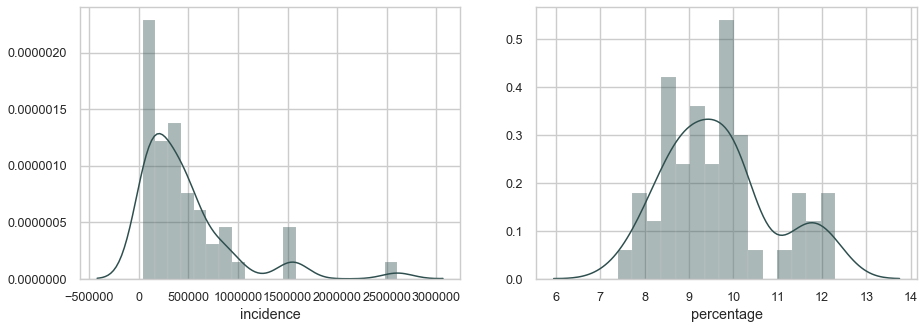

In [6]:
import matplotlib.pyplot as plt
import warnings
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['incidence'], bins=20, color = 'darkslategrey')
plt.subplot(1,2,2)
sns.distplot(df['percentage'], bins=15, color = 'darkslategrey')

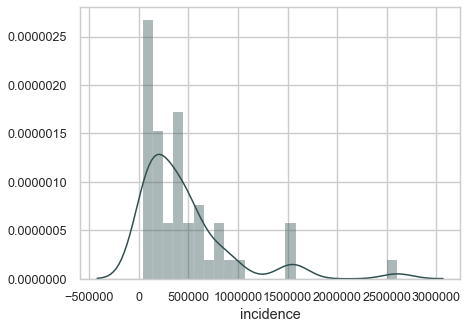

In [12]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot((df['incidence']), bins = 25, color = 'darkslategrey')